# CM50266 Applied Data Science 
# Lab 2: Sentiment Analysis of Car Reviews



In [1]:
import csv
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.util import ngrams
import re
from sklearn.model_selection import train_test_split

import numpy

from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from string import punctuation
import seaborn as sn

## Data
You are provided with a large dataset of reviews for Ford motor vehicles (car_reviews.csv) on Moodle. Each review is labelled with either ‘Pos’ or ‘Neg’ to indicate whether the review has been assessed as positive or negative in the sentiment it expresses. You should treat these labels as a reliable indicator of sentiment. You can assume that there are no neutral reviews. There are 1,382 reviews in the CSV file in total, 691 of which are positive and 691 of which are negative.

In [2]:

#Reading in the data into a list of lists using csv module
with open('car_reviews.csv') as f:
        
        reader = csv.reader(f)
        next(reader)
        data = []
        for row in reader:
            
            data.append(row)   
            
n_grams = data.copy()

## Proccessing the Data --

-- I will be processing all the data as one before splitting into train and test splits. This is ok as I will be doing the same processing on all my data and not treating the two different splits differently. By doing this I will be avoiding data leakage. All my processing is done in the code beliew, and I will clearly label examples of the following.

### Tokenising all Reviews --

-- In this markdown section I will discuss the below piece of code. The first part of processing this data was juist to make sure there was no punctuation in the reviews. I do this by importing the re module and substiting all punctuation with nothing. This means 'don't' would go to 'dont'. I then also use nltk's tokenise package to find all the tokens in a sentence, which basically splits up a sentence on the spaces and returns a list of the words that review contains.

### Stop Words -- 

-- We want to establish the words in a review that will have little or no impact on sentiment. For example, 'the', will have absolutely no influence on whether a review is positive or negative. There are many ways of doing this. I have opted to use NLTK's library of stopwords as a definition and then sorted through my tokenised reviews creating a new data structure. They will only get added to the new data structure if they are not in the stopwords. An example of all the stop words I use ---

['after', 'hasn', 'yourselves', 'theirs', 'that', "doesn't", 'ourselves', 'than', "it's", 'in', 'nor', 'against', 'at', 'too', 'below', "don't", 'because', 'her', 'here', 'wouldn', 'again', "didn't", 'to', "mustn't", 'does', 'them', 'of', 'him', 'couldn', 'but', 'further', 'mightn', 'himself', 'these', 'i', "that'll", 'between', "aren't", 'weren', 'your', 'myself', "weren't", 'with', 'while', 't', 'same', 'any', 've', 'me', 'do', 'very', 'wasn', 'what', 'through', 'were', 'when', "couldn't", 'and', 'only', 'a', 'how', 'its', 'shouldn', 'as', 'ours', 'm', 'up', 'out', 'before', 'mustn', 'few', 's', 'above', 'more', 'on', 'down', 'whom', 'should', 'other', 'an', 'didn', 'having', 'needn', 'each', 'this', 'so', 'herself', 'was', 'are', 'no', "mightn't", 'itself', "should've", 'off', 'during', 'd', 'by', 'not', 'has', 'he', 'if', 'am', "wasn't", 'they', 'then', 'isn', "hadn't", "wouldn't", 'own', 'you', 'the', 'have', 'there', 'both', 'most', 'some', 'such', "needn't", 'did', 'about', 'she', 'who', 'for', 'can', 'hers', 'why', "won't", 'o', "shouldn't", 'doing', 'had', 'be', 'is', "you'll", 'hadn', 'haven', 'aren', 'been', 'themselves', 'from', 'shan', 'yourself', 'doesn', 'where', 'ain', "isn't", 'my', 'under', "shan't", 'over', "haven't", 'will', 'into', 'which', 'being', 'now', "hasn't", 'his', 'until', 'their', 'those', 'we', 'ma', 'yours', "she's", 'just', 'll', "you've", 'y', 'won', 'don', 'once', 're', 'all', 'or', 'it', "you'd", 'our', "you're"]


### Stemming the Remaining Tokens --

-- Stemming is the process of treating the group of words as a evolution of an original word called a stem. For an example lets look ath the words, "played", "plays", "playing". These are all variations of the words play, so we treat 'play' as the stem and what we want and hope to do is to treat 'plays','played','playing' as the same word 'play'. The reasons for this is that we believe that these variations don't add anything in regards to sentiment, hence we can just treat them all as the same word. To do this I use a portalstemmer from the NLTK package.

### Making all remaining words lowercase -- 

-- The last bit of processing of the data I do is just to make all remaining reviews all lowercase. This is to avoid any confusion with case later on as python does distinguish words based on whether they are capitalised or not. For example python will not recognise if "Play" and "play" are the same word. To counter this then, i just make everything lowercase. 



-- BRIEF OVERVIEW -- 

                  -- Removed all punctuation from reviews
               
                  -- Tokenized all words in the reviews, so we now have a set of tokens for each review
                  
                  -- Defined stopwords and removed them from the reviews
                  
                  -- Stemmed all remaining words
                  
                  -- Made every remaining word lowercase
               




In [3]:
new_data = data.copy()
# Define stopwords from NLTK 
stopWords = set(stopwords.words('english'))
# Define the stemmer used from NLTK
stemmer = PorterStemmer()
#Empty lists to define my x and y datasets, where y[i] has the outcome to review x[i]
x = []
y = []


for i in range(len(data)) :
    # makes the outcome lowercase
    y.append(data[i][0].lower())
    
    # creates empty list for each review
    txt_review = []
    # removes all punctuation
    new_data[i][1] = re.sub(r'\d+', '', new_data[i][1])
    # tokenises the review
    new_data[i][1] = nltk.word_tokenize(new_data[i][1])
    
    #iterates through the tokens to check they are not stopwords
    for word in new_data[i][1] :
        if word.lower() not in stopWords :
            # Gets rid of all words less than 3 in length, as will not add to sentiment 
            if len(word) > 2 :
                
                # stem the remaining words, making them lower case at the same time
                txt_review.append(stemmer.stem(word.lower()))
    x.append(txt_review)
    
    



## StopWords + LowerCase Example -- 

Below is a couple of prints comparing the original dataset to my processed dataset. We will focussing on how we have removed the stopwords, punctuation and have made all remaining words lowercase -- 

In [4]:
print("The original data -- ")
print("-----------------------")
print(n_grams[900][1])
print("-----------------------")

The original data -- 
-----------------------
['We', 'bought', 'the', 'Ford', 'Explorer', 'because', 'it', 'had', 'more', 'room', 'than', 'the', 'Mazda', 'Protege', 'we', 'used', 'to', 'own', 'I', 'absolutely', 'love', 'my', 'truck', 'My', 'husband', 'and', 'I', 'bought', 'it', 'with', 'all', 'wheel', 'drive', 'all', 'the', 'time', 'I', 'like', 'the', 'way', 'it', 'rides', 'it', 'feels', 'like', 'we', 're', 'riding', 'on', 'a', 'pillow', 'The', 'only', 'complaint', 'I', 'have', 'about', 'it', 'is', 'that', 'it', 'guzzles', 'gas', 'but', 'thats', 'because', 'in', 'order', 'to', 'get', 'the', 'all', 'wheel', 'all', 'time', 'you', 'had', 'to', 'buy', 'the', 'V', 'The', 'V', 'has', 'awesome', 'pick', 'up', 'its', 'the', 'engine', 'that', 'used', 'to', 'be', 'put', 'into', 'a', 'Mustang', 'Its', 'a', 'lot', 'of', 'fun', 'to', 'drive', 'The', 'people', 'who', 'want', 'to', 'buy', 'it', 'is', 'someone', 'looking', 'for', 'a', 'bigger', 'vehicle', 'It', 'may', 'be', 'a', 'little', 'more', 'exp

In [5]:
print("The data after Processing --")
print("-----------------------")
print(x[900])
print("-----------------------")

The data after Processing --
-----------------------
['bought', 'ford', 'explor', 'room', 'mazda', 'proteg', 'use', 'absolut', 'love', 'truck', 'husband', 'bought', 'wheel', 'drive', 'time', 'like', 'way', 'ride', 'feel', 'like', 'ride', 'pillow', 'complaint', 'guzzl', 'ga', 'that', 'order', 'get', 'wheel', 'time', 'buy', 'awesom', 'pick', 'engin', 'use', 'put', 'mustang', 'lot', 'fun', 'drive', 'peopl', 'want', 'buy', 'someon', 'look', 'bigger', 'vehicl', 'may', 'littl', 'expens', 'sport', 'util', 'vehicl', 'might', 'make', 'person', 'want', 'buy']
-----------------------


#### COMPARISON --

Lets compare the original data to the data after we have processed it. So what we are looking for is that we remove all stopwords and punctuation. We can clearly see this, with such exampls like 'We', 'in', 'it' are all removed after we have processed the data. Furthermore notice how every single token is now lowercase, to avoid any confusion with capitalised words of which python treat them differently. Below in bold letters are the words that are removed due to either being stopwords or being less that 3 characters in length which would also not affect sentiment. We can also see that all tokens are now only with lowercase letters. Note -- some words are now less than 3 characters in length due to stemming which I applied after this step.

[**'We'**, 'bought', **'the'**, 'Ford', 'Explorer', **'because'**, **'it'**, **'had'**, **'more'**, 'room', **'than'**, **'the'**, 'Mazda', 'Protege', **'we'**, 'used', **'to'**, **'own'**, **'I'**, 'absolutely', 'love', **'my'**, 'truck', **'My'**, 'husband', **'and'**, **'I'**, 'bought', **'it'**, **'with'**, **'all'**, 'wheel', 'drive', **'all'**, **'the'**, 'time', **'I'**, 'like', **'the'**, 'way', **'it'**, 'rides', **'it'**, 'feels', 'like', **'we'**, **'re'**, 'riding', **'on'**, **'a'**, 'pillow', **'The'**, 'only', 'complaint', **'I'**, **'have'**, **'about'**, **'it'**, **'is'**, **'that'**, **'it'**, 'guzzles', 'gas', **'but'**, 'thats', **'because'**, **'in'**, 'order', **'to'**, 'get', **'the'**, **'all'**, 'wheel', **'all'**, 'time', **'you'**, **'had'**, **'to'**, 'buy', **'the'**, **'V'**, **'The'**, **'V'**, **'has'**, 'awesome', 'pick', **'up'**, **'its'**, **'the'**, 'engine', **'that'**, 'used', **'to'**, **'be'**, 'put', **'into'**, **'a'**, 'Mustang', **'Its'**, **'a'**, 'lot', **'of'**, 'fun', **'to'**, 'drive', **'The'**, 'people', **'who'**, 'want', **'to'**, 'buy', **'it'**, **'is'**, 'someone', 'looking', **'for'**, **'a'**, 'bigger', 'vehicle', **'It'**, **'may'**, **'be'**, **'a'**, 'little', **'more'**, 'expensive', **'than'**, **'some'**, **'other'**, 'Sport', 'Utility', 'Vehicles', **'and'**, **'that'**, 'might', 'make', **'a'**, 'person', **'not'**, 'want', **'to'**, 'buy', **'it'**]

['bought', 'ford', 'explor', 'room', 'mazda', 'proteg', 'use', 'absolut', 'love', 'truck', 'husband', 'bought', 'wheel', 'drive', 'time', 'like', 'way', 'ride', 'feel', 'like', 'ride', 'pillow', 'complaint', 'guzzl', 'ga', 'that', 'order', 'get', 'wheel', 'time', 'buy', 'awesom', 'pick', 'engin', 'use', 'put', 'mustang', 'lot', 'fun', 'drive', 'peopl', 'want', 'buy', 'someon', 'look', 'bigger', 'vehicl', 'may', 'littl', 'expens', 'sport', 'util', 'vehicl', 'might', 'make', 'person', 'want', 'buy']

## Stemming Example -- 

Below will be a couple of prints that will show my use of stemming. For this I have used NLTK Portal Stemmer package. The Porter stemming algorithm (or 'Porter stemmer') is a process for removing the commoner morphological and inflexional endings from words in English. Its main use is as part of a term normalisation process that is usually done when setting up Information Retrieval systems. I will show a few examples then look for examples in my code ---

In [6]:
stemmer = PorterStemmer()
print("play --> AFTER STEMMING --", stemmer.stem("play"))
print("plays --> AFTER STEMMING --", stemmer.stem("plays"))
print("played --> AFTER STEMMING --", stemmer.stem("played"))
print("playing --> AFTER STEMMING --", stemmer.stem("playing"))

play --> AFTER STEMMING -- play
plays --> AFTER STEMMING -- play
played --> AFTER STEMMING -- play
playing --> AFTER STEMMING -- play


In [7]:
print("computer --> AFTER STEMMING --", stemmer.stem("computer"))
print("computing --> AFTER STEMMING --", stemmer.stem("computing"))
print("compute --> AFTER STEMMING --", stemmer.stem("compute"))
print("computed --> AFTER STEMMING --", stemmer.stem("computed"))

computer --> AFTER STEMMING -- comput
computing --> AFTER STEMMING -- comput
compute --> AFTER STEMMING -- comput
computed --> AFTER STEMMING -- comput


In [8]:
print("game --> AFTER STEMMING --", stemmer.stem("game"))
print("gaming --> AFTER STEMMING --", stemmer.stem("gaming"))
print("games --> AFTER STEMMING --", stemmer.stem("games"))
print("gamed --> AFTER STEMMING --", stemmer.stem("gamed"))

game --> AFTER STEMMING -- game
gaming --> AFTER STEMMING -- game
games --> AFTER STEMMING -- game
gamed --> AFTER STEMMING -- game


There is an example of how it works, now lets see an example in my code --

In [9]:
print("Before processing --")
print("---------------")
print(n_grams[979])
print("---------------")

Before processing --
---------------
['Pos', ['Captured', 'by', 'the', 'styling', 'I', 'have', 'to', 'admit', 'we', 'were', 'captured', 'by', 'the', 'appearance', 'of', 'the', 'GT', 'Convertible', 'As', 'teenagers', 'in', 'the', 'early', 's', 'the', 'stying', 'is', 'obviously', 'a', 'through', 'back', 'to', 'that', 'era', 'We', 'love', 'looks', 'Strong', 'V', 'Although', 'I', 'wouldnt', 'want', 'to', 'race', 'a', 'h', 'p', 'Camero', 'SS', 'the', 'h', 'p', 'V', 'has', 'an', 'amazing', 'amount', 'of', 'power', 'Ford', 'must', 'have', 'also', 'done', 'their', 'homework', 'in', 'producing', 'the', 'exhaust', 'note', 'of', 'this', 'engine', 'It', 'has', 'a', 'beautiful', 'beefy', 'sound', 'under', 'acceleration', 'but', 'is', 'quiet', 'at', 'steady', 'speeds', 'Small', 'but', 'comfortable', 'on', 'the', 'inside', 'I', 'am', 'and', 'lbs', 'but', 'feel', 'very', 'much', 'at', 'home', 'in', 'the', 'cockpit', 'of', 'the', 'Mustang', 'One', 'caveat', 'though', 'if', 'you', 'opt', 'for', 'standar

In [10]:
print("After Processing --")
print("---------------")
print(x[979])
print("---------------")

After Processing --
---------------
['captur', 'style', 'admit', 'captur', 'appear', 'convert', 'teenag', 'earli', 'sti', 'obvious', 'back', 'era', 'love', 'look', 'strong', 'although', 'wouldnt', 'want', 'race', 'camero', 'amaz', 'amount', 'power', 'ford', 'must', 'also', 'done', 'homework', 'produc', 'exhaust', 'note', 'engin', 'beauti', 'beefi', 'sound', 'acceler', 'quiet', 'steadi', 'speed', 'small', 'comfort', 'insid', 'lb', 'feel', 'much', 'home', 'cockpit', 'mustang', 'one', 'caveat', 'though', 'opt', 'standard', 'interior', 'instead', 'premium', 'seat', 'much', 'less', 'comfort', 'least', 'guy', 'size', 'make', 'sure', 'test', 'decid', 'good', 'fit', 'finish', 'read', 'less', 'favor', 'remark', 'fit', 'finish', 'mustang', 'howev', 'pleas', 'new', 'style', 'camero', 'mustang', 'mustang', 'seem', 'durabl', 'compon', 'cab', 'camero', 'time', 'tell', 'mustang', 'sinc', 'june', 'rel', 'poor', 'ga', 'mileag', 'date', 'one', 'minor', 'complaint', 'car', 'thirsti', 'averag', 'mile', 'g

#### COMPARISON -- 

Here in the code we look at a comparison from before we have stemmed to after we have stemmed and we point out some examples --

We have highlighted just a few but you can see both the pro's and con's of this stemming technique from this -

-- Captured appears twice in the first line, and they both get stemmed to captur

-- styling gets stemmed to style 

-- appearance gets stemmed to appear

-- remarks gets stemmed to remark


Now although some words get stemmed into words that don't actually exist, this doesn't matter because with this algorithm the portal stemmer will make all variations into that stem whether the stem is a word or ot, so in this case we don't mind this.


[**'Captured'**, 'by', 'the', **'styling'**, 'I', 'have', 'to', 'admit', 'we', 'were', **'captured'**, 'by', 'the', **'appearance'**, 'of', 'the', 'GT', **'Convertible'**, 'As', **'teenagers'**, 'in', 'the', 'early', 's', 'the', 'stying', 'is', 'obviously', 'a', 'through', 'back', 'to', 'that', 'era', 'We', 'love', 'looks', 'Strong', 'V', 'Although', 'I', 'wouldnt', 'want', 'to', 'race', 'a', 'h', 'p', 'Camero', 'SS', 'the', 'h', 'p', 'V', 'has', 'an', 'amazing', 'amount', 'of', 'power', 'Ford', 'must', 'have', 'also', 'done', 'their', 'homework', 'in', 'producing', 'the', 'exhaust', 'note', 'of', 'this', 'engine', 'It', 'has', 'a', 'beautiful', 'beefy', 'sound', 'under', 'acceleration', 'but', 'is', 'quiet', 'at', 'steady', 'speeds', 'Small', 'but', 'comfortable', 'on', 'the', 'inside', 'I', 'am', 'and', 'lbs', 'but', 'feel', 'very', 'much', 'at', 'home', 'in', 'the', 'cockpit', 'of', 'the', 'Mustang', 'One', 'caveat', 'though', 'if', 'you', 'opt', 'for', 'standard', 'interior', 'instead', 'of', 'the', 'premium', 'the', 'seats', 'are', 'much', 'less', 'comfortable', 'a', 'least', 'for', 'a', 'guy', 'my', 'size', 'Make', 'sure', 'to', 'test', 'both', 'before', 'deciding', 'Good', 'fit', 'and', 'finish', 'I', 'have', 'read', 'less', 'then', 'favorable', **'remarks'**, 'about', 'the', 'fit', 'and', 'finish', 'on', 'the', 'Mustang', 'However', 'I', 'am', 'very', 'pleased', 'We', 'own', 'both', 'a', 'new', 'style', 'Camero', 'and', 'the', 'Mustang', 'The', 'Mustang', 'seems', 'to', 'have', 'more', 'durable', 'components', 'in', 'the', 'cab', 'then', 'our', 'Camero', 'Time', 'will', 'tell', 'as', 'we', 'have', 'only', 'had', 'the', 'Mustang', 'since', 'June', 'of', 'Relatively', 'poor', 'gas', 'mileage', 'To', 'date', 'I', 'have', 'only', 'one', 'minor', 'complaint', 'about', 'the', 'car', 'it', 'is', 'thirsty', 'We', 'average', 'miles', 'to', 'gallon', 'in', 'town', 'I', 'guess', 'we', 'should', 'have', 'expected', 'this', 'but', 'I', 'actually', 'thought', 'it', 'might', 'be', 'closer', 'to']]


[**'captur'**, **'style'**, 'admit', **'captur'**, **'appear'**, **'convert'**, **'teenag'**, 'earli', 'sti', 'obvious', 'back', 'era', 'love', 'look', 'strong', 'although', 'wouldnt', 'want', 'race', 'camero', 'amaz', 'amount', 'power', 'ford', 'must', 'also', 'done', 'homework', 'produc', 'exhaust', 'note', 'engin', 'beauti', 'beefi', 'sound', 'acceler', 'quiet', 'steadi', 'speed', 'small', 'comfort', 'insid', 'lb', 'feel', 'much', 'home', 'cockpit', 'mustang', 'one', 'caveat', 'though', 'opt', 'standard', 'interior', 'instead', 'premium', 'seat', 'much', 'less', 'comfort', 'least', 'guy', 'size', 'make', 'sure', 'test', 'decid', 'good', 'fit', 'finish', 'read', 'less', 'favor', **'remark'**, 'fit', 'finish', 'mustang', 'howev', 'pleas', 'new', 'style', 'camero', 'mustang', 'mustang', 'seem', 'durabl', 'compon', 'cab', 'camero', 'time', 'tell', 'mustang', 'sinc', 'june', 'rel', 'poor', 'ga', 'mileag', 'date', 'one', 'minor', 'complaint', 'car', 'thirsti', 'averag', 'mile', 'gallon', 'town', 'guess', 'expect', 'actual', 'thought', 'might', 'closer']



## Split the data into train + test sets

Split the data randomly into 80% training data and 20% for testing purposes! 

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

Print a couple of statistics to check the split was done right!

In [12]:
print(len(x_train), len(x_test), len(y_train), len(y_test))

1105 277 1105 277


## Counting the Words --

Now that we have split our data we can start working with our x_train. I start to build a bag of words model, i.e treating the training set as one big bag of words. I will transform the x_train dataset into a dictionary of all the unique words in he x_train reviews. For example if we look at the word 'ford', i will have a key ford : [#####,#####], Where each key has a list of two values. The count of that word in a positive context and a count of that word in a negative context. 

In [13]:
def count(x_train,y_train) :

    word_count = {}

    for i in range(len(x_train)) :
        for word in x_train[i] :
            if word not in word_count :
                #initialise that key in the dict
                a = [0,0]
                if y_train[i] == 'pos' :
                    a[0] += 1
                else :
                    a[1] += 1
                word_count[word] = a
            else :
                if y_train[i] == 'pos' :
                    word_count[word][0] += 1
                else :
                    word_count[word][1] += 1
    return word_count
            
        

In [14]:
word_count = count(x_train,y_train)

## Example of Word Count --

In [15]:
print(" ford :", word_count['ford'])

 ford : [1267, 1691]


In [16]:
print(" great :", word_count['great'])

 great : [456, 253]


In [17]:
print(" bad :", word_count['bad'])

 bad : [123, 250]


Here we have three examples of the word_count dictionary and how it stores values --

ford : [1252, 1605] 

This represents ford being used in a positive context 1252 times and, 1605 in a negative context. Similarly shown for the words 'great' and 'bad.'

# Naive Bayes Classifier --

Now I will start to try to implement a naive bayes classifier on this training set. In order to do this I need to calculate some key statistics to do with the training set. I will start by counting the number of unique words, the total number of positive and negative words repectively. I then go on to work out the probability of a review being positive or negative with this being a prior probabilities.

In [18]:
total_positive_words = 0
total_negative_words = 0
for i in word_count.keys() :
    total_positive_words += word_count[i][0]
    total_negative_words += word_count[i][1]
    
print("------------------------")
print("TOTAL POS WORDS -------")
print(total_positive_words)
print("------------------------")
print("TOTAL NEG WORDS -------")
print(total_negative_words)
print("------------------------")
print("TOTAL UNIQUE WORDS")
print(len(word_count))
print("------------------------")
total = len(word_count)
    

------------------------
TOTAL POS WORDS -------
110857
------------------------
TOTAL NEG WORDS -------
123425
------------------------
TOTAL UNIQUE WORDS
8815
------------------------


In [19]:
count_p = 0
count_n = 0
for i in y_train : 
    if i == 'pos' :
        count_p += 1
        
    else :
        count_n +=1
        

prob_p = count_p / len(y_train)
prob_n = count_n / len(y_train)

print("------------------------")
print("PRIOR PROBABILITIES ---")
print("Probability of a review being positivie ---- ", prob_p)
print("Probability of a review being negative ---- ", prob_n)
print("------------------------")

------------------------
PRIOR PROBABILITIES ---
Probability of a review being positivie ----  0.5004524886877828
Probability of a review being negative ----  0.4995475113122172
------------------------


# Training --

### Likelhood  -- 

P(w_i|c) is the probability of word w_i occurring in a document of class c. Again we can use the frequencies in our corpus to compute this. This will simply be the number of times word w_i occurs in documents of class c, divided by the sum of the counts of each word that appears in documents of class c.

We can compute all the terms in our formulation, meaning that we can calculate the most likely class of our test document! There is only one issue that we need to deal with: zero probabilities.

### Smoothing

Imagine that you are trying to classify a review that contains the word ‘stupendous’ and that your classifier hasn't seen this word before. Naturally, the probability P(w_i|c) will be 0, making the second term of our equation go to negative infinity! This is a common problem in NLP but thankfully it has an easy fix: smoothing. This technique consists in adding a constant to each count in the P(w_i|c) formula, with the most basic type of smoothing being called add-one (Laplace) smoothing, where the constant is just 1. The point of this is that when we apply the naive bayes, we multiply the necassary probabilities together, now if a word does not exist, then the probability with this smoothing constant would be 0. So the whole probability would become 0. To avoid this we apply these smoothing methods. 


\begin{equation*}
P(w_i | c) = \frac{count(w_i, c) + 1}{( \sum_{w} count(w , c) + 1 )}
\end{equation*}

So using this, I build up exactly the same dictionary as in the word_counts, but instead of counts of certain word its the likelhoods. 

i.e ford : [ P(Ford | + ), P(Ford | - ) ] 

In [20]:
prob_dict = {}
for i in word_count.keys() :
    prob_i_p = (word_count[i][0] + 1) / (total_positive_words + len(word_count))
    prob_i_n = (word_count[i][1] + 1) / (total_negative_words + len(word_count))
    prob_dict[i] = [prob_i_p,prob_i_n]

In [21]:
print("poor :", prob_dict['poor'])

poor : [0.00031753459455845977, 0.0006654567453115548]


# Naive Bayes Final Step --

### Classifying

We have this dictionary full of words now and their corresponding likelhoods of being either used in a positive sentiment or a negative sentiment. Whats left to do is to test this all out on the x_test set of data to see how good our model is. 

When the training is done we have all the necessary values to make a prediction. This will simply consist in taking a new (unseen) document and computing the probabilities for each class that has been observed during training.

Naive Bayes assumption: given a class c, the presence of an individual feature of our document is independent on the others. The Naive Bayes assumption lets us substitute P(d|c) by the product of the probability of each feature conditioned on the class because it assumes their independence.
We can make one more change: maximize the log of our function instead. The reason for this is purely computational, since the log space tends to be less prone to underflow and more efficient.

We cope with words that don't appear in the training set by applying laplace smoothing. Howevere if we start to test our naive bayes, and we have a word in our test review that is not in our trianing review, the way my code deals with it is that we don'y count it in our naive bayes. This is acceptable as we can see this word as so unlikely to come up that it is next to nothing with regards to its probability and can also say on a similar line that this will have little to no affect on the sentiment. Hence, When computing the necassary statistics if the word is not in our big bag of words then we don't count it. 

In [22]:
y_predict = []
for review in x_test :
    pos = prob_p
    neg = prob_n
    for word in review :
        if word in prob_dict :
            pos += numpy.log(prob_dict[word][0])
            neg += numpy.log(prob_dict[word][1])
            
    if pos > neg :
        y_predict.append('pos')
    else :
        y_predict.append('neg')
    

In [23]:
print(confusion_matrix(y_test, y_predict))
accuracy = accuracy_score(y_test,y_predict)



print("The accuracy of the classifier on the test set is %.3f" % accuracy)

[[104  35]
 [ 27 111]]
The accuracy of the classifier on the test set is 0.776


## Confusion Matrix --

Below is the confusion matrix for the Naive bayes classifier on the car reviews dataset. This is from training on 80% of the data and this is the resultant test on the remaining 20% of the data. Here 0 represents a negative review and 1 represents a positive review! 

WHERE actual = 1 & predicted = 1 -----> TRUE POSITIVE

WHERE actual = 0 & predicted = 0 -----> TRUE NEGATIVE

WHERE actual = 1 & predcited = 0 -----> FALSE NEGATIVE

WHERE actual = 0 & predicted = 1 -----> FALSE POSITIVE

THE CONFUSION MATRIX SHOWS THE COUNTS OF EACH INSTANCE!!!

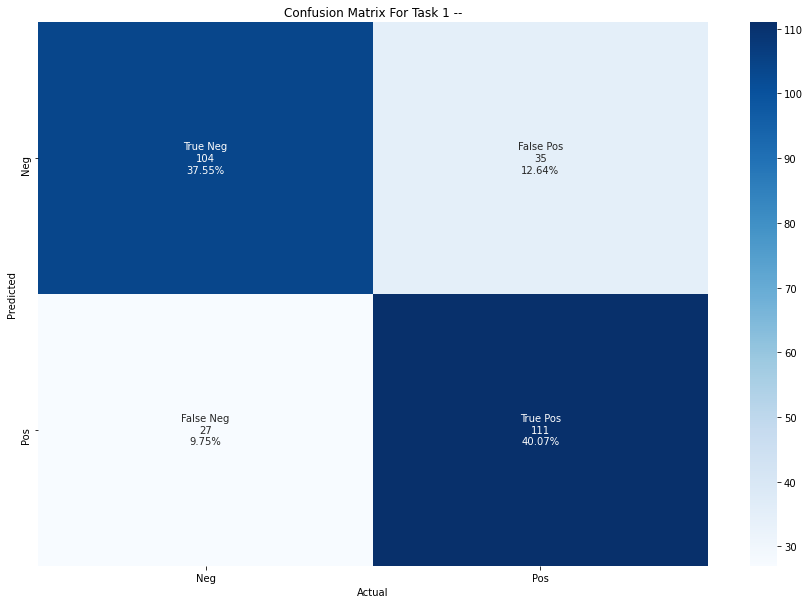

In [24]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]

cf_matrix = confusion_matrix(y_test, y_predict)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/numpy.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = numpy.asarray(labels).reshape(2,2)

categories = ["Neg", "Pos"]



plt.figure(figsize=(15,10))
ax = sn.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=categories,yticklabels=categories)
ax.set_ylabel('Predicted')    
ax.set_xlabel('Actual')
ax.set_title("Confusion Matrix For Task 1 --")
plt.show(ax)

# Part two --

Identify and research a way to improve on your solution to Task 1, that you would expect to do better at classifying the sentiment of the reviews.

You may either:

• identify an alternative classification algorithm, or

• apply modifications to the Naïve Bayes implementation, for example trying different classification of
different size n-grams (multi-word phrases). Implement this improvement and compare the results to your initial Naïve Bayes classifier.


## N-Grams --

Right now we have built our model using a uni-gram model, i.e. treating each word on independent of the words that appear before or after it. There is a problem with this, for example if we look at where the word 'good' appears in our reviews. Instinctively, we would probably assign a positive sentiment, and we are probably right but what if actually the in the review it was used as the expression, 'not good.' This definitely has a negative sentiment, and this is what our uni-gram model misses and is what I will look to develop in this second half of this project. To consider phrases like 'not good', we consider a bi-gram case. This could also be stated as a 2-gram case. This simply means that instead of considering singular tokens as in the previous case, we will now consider groups of two words when building our model. An example could be that, if we have a sentence, "This car was really nice". The bi-gram model would split this up as [["This car"],["car was"],["was really"],["really nice"]]. The tri-gram case would split it into groups of three words, and so on and so on for any number N in our N-gram model. This is now our approach, to consider these groups of words which in theory will tell us much more about the sentiment that just considering the word on it's own.

### How is it expected to improve our model?

One of the problems with this approach is that a word’s context can matter nearly as much as its presence. For example, the words “happy” and “like” will be counted as positive, even in a sentence like “I’m not happy and I don’t like it!”

So we have split out data into tokens, and then grouped our tokens depending on our bi-gram, tri-gram...., n-gram model. How is this going to improve our model? As touched on before with this new grouping of words we can examine how often steiment-associated words are preceded by 'not' or other negating words. This is such a big thing because, in a unigram model we are technically counting these words as either positive or negative, whereas if they have this ngating word prior to this, then that sentiment completely flips to the oppositie. We would expect this to improve performance.  

Siege and robinson et al[1] decide to create an n-grams model on all of Jane Austen's novels. They do the same preprocessing as we are asked to do in this task by removing stopwords... etc. Their reason for doing this, is to notice the advantages of examining bigrams rather than individual words. They notice that pairs of consecutive words will capture structure that isn't present when we just consider counting single words. This therefore may provide context/sentiment that make tokens more undesrstandable. An example they use with regards to Austen's books, is that, "pulteney street", has much more meaning than just "pulteney" on its own. The problem of this however is that a typical two-word pair is definitely rarer than find those words on their own. Thus, we need a large dataset to consider, luckily in our example we have this.


#### REFERENCES --



[1] "TEXT MINING WITH R,  Julia Silge and David Robinson, 2007, https://www.tidytextmining.com/ngrams.html"

    https://www.tidytextmining.com/index.html




[2]  "The Use of Bigrams to Enhance Text Categorization", Chade-Meng Tan, Yuan-Fang Wang, Department of   
       Computer, Science University of California

    https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.2.1938&rep=rep1&type=pdf







### Sklearn Approach --

Before I implemented the uni-gram version of the naive bayes classifier from scratch, from now on I will reload the data into a panda dataframe and apply sklearn packages to do the same thing.

    

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import time
from sklearn.metrics import plot_confusion_matrix

In [26]:
#import data into panda dataframe
car_reviews = pd.read_csv('car_reviews.csv')


In [27]:
#Our X's in our data corresponds to all the reviews
X = car_reviews['Review']
# The Y's correspond to whether a review was positive or negative
Y = car_reviews['Sentiment']

In [28]:
#Split the data up into 80% training data, and 20% testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### UNI-GRAM --

In [29]:
# Unigram case using sklearn! we have a vectoriser which vectorises all our reviews 
# This approach also removes stopWords
# We also vectorise the test data!
vectorizer = CountVectorizer(lowercase=True, stop_words='english')

# fit and transform X_train
X_train_bow = vectorizer.fit_transform(X_train)

# Transform X_test
X_test_bow = vectorizer.transform(X_test)


#Corresponding shapes of the train and test data! 
print(X_train_bow.shape)
print(X_test_bow.shape)

(1105, 15188)
(277, 15188)


In [30]:
# Create a MultinomialNB object
clf = MultinomialNB()

start_time = time.time()

# Fit the classifier
clf.fit(X_train_bow, Y_train)



# Measure the accuracy
accuracy = clf.score(X_test_bow, Y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)
print("The program took %.3f seconds to complete" %(time.time() - start_time))

The accuracy of the classifier on the test set is 0.783
The program took 0.011 seconds to complete


### Confusion matrix for UNI-GRAM approach --

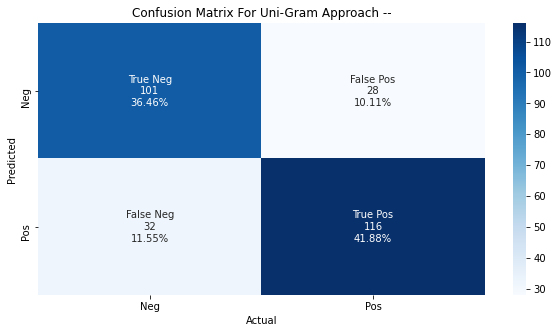

In [31]:
cf_matrix_1_gram = confusion_matrix(clf.predict(X_test_bow), Y_test)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_1_gram.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_1_gram.flatten()/numpy.sum(cf_matrix_1_gram)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = numpy.asarray(labels).reshape(2,2)

categories = ["Neg", "Pos"]



plt.figure(figsize=(10,5))
ax = sn.heatmap(cf_matrix_1_gram, annot=labels, fmt='', cmap='Blues', xticklabels=categories,yticklabels=categories)
ax.set_ylabel('Predicted')    
ax.set_xlabel('Actual')
ax.set_title("Confusion Matrix For Uni-Gram Approach --")
plt.show(ax)


### BI-GRAM --

In [32]:
#Same as unigram approach, this time we only consider ngram_range = 2. ONLY BIGRAMS


#Vectorise our data on these bigrams
# This approach also removes stopWords
vectorizer = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(2,2))

# fit and transform X_train
train_X = vectorizer.fit_transform(X_train)
# Transform X_test
test_X = vectorizer.transform(X_test)

#Calculate time to implement classifier for later comparison
start_time = time.time()

# Create a MultinomialNB object
clf2 = MultinomialNB()

# Fit classifier
clf2.fit(train_X, Y_train)

# Measure the accuracy
accuracy = clf2.score(test_X, Y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)
print("The program took %.3f seconds to complete" %(time.time() - start_time))

The accuracy of the classifier on the test set is 0.747
The program took 0.018 seconds to complete


### Confusion matrix for BI-GRAM approach --

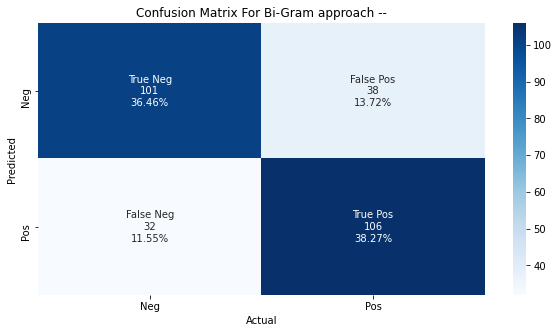

In [33]:
cf_matrix_2_gram = confusion_matrix(clf2.predict(test_X), Y_test)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_2_gram.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_2_gram.flatten()/numpy.sum(cf_matrix_2_gram)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = numpy.asarray(labels).reshape(2,2)

categories = ["Neg", "Pos"]



plt.figure(figsize=(10,5))
ax = sn.heatmap(cf_matrix_2_gram, annot=labels, fmt='', cmap='Blues', xticklabels=categories,yticklabels=categories)
ax.set_ylabel('Predicted')    
ax.set_xlabel('Actual')
ax.set_title("Confusion Matrix For Bi-Gram approach --")
plt.show(ax)

### TRI-GRAM --

In [34]:
#Same as unigram approach, this time we only consider ngram_range = 3. ONLY TRIGRAMS


# Vectorise our data on these trigrams
# This approach also removes stopWords
vectorizer = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(3,3))

# fit and transform X_train
train_X = vectorizer.fit_transform(X_train)

# Transform X_test
test_X = vectorizer.transform(X_test)


#Calculate time to implement classifier for later comparison
start_time = time.time()

# Create a MultinomialNB object
clf3 = MultinomialNB()

# Fit classifier
clf3.fit(train_X, Y_train)

# Measure the accuracy + time
accuracy = clf3.score(test_X, Y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)
print("The program took %.3f seconds to complete" %(time.time() - start_time))

The accuracy of the classifier on the test set is 0.657
The program took 0.026 seconds to complete


### Confusion matrix for TRI-GRAM approach --

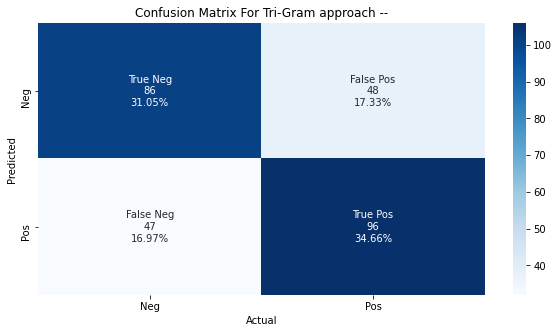

In [35]:
cf_matrix_3_gram = confusion_matrix(clf3.predict(test_X), Y_test)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_3_gram.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_3_gram.flatten()/numpy.sum(cf_matrix_3_gram)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = numpy.asarray(labels).reshape(2,2)

categories = ["Neg", "Pos"]



plt.figure(figsize=(10,5))
ax = sn.heatmap(cf_matrix_2_gram, annot=labels, fmt='', cmap='Blues', xticklabels=categories,yticklabels=categories)
ax.set_ylabel('Predicted')    
ax.set_xlabel('Actual')
ax.set_title("Confusion Matrix For Tri-Gram approach --")
plt.show(ax)

### UNI-GRAM + BI-GRAM --

In [36]:
#Same as unigram approach, this time we only consider ngram_range = 1,2. 
#This means we consider a BOW model, where we have bag full of all the 
#unigrams but on top of that we have the bigrams too


#Vectorise our data on 1,2 gram case + removing stopWords
vectorizer = CountVectorizer(lowercase=True, stop_words='english',ngram_range=(1,2))

# fit and transform X_train
train_X = vectorizer.fit_transform(X_train)

# Transform X_test
test_X = vectorizer.transform(X_test)


#Calculate time to implement classifier for later comparison
start_time = time.time()

# Create a MultinomialNB object
clf12 = MultinomialNB()

# Fit classifier
clf12.fit(train_X, Y_train)

accuracy = clf12.score(test_X, Y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)
print("The program took %.3f seconds to complete" %(time.time() - start_time))

The accuracy of the classifier on the test set is 0.776
The program took 0.020 seconds to complete


### Confusion matrix for UNI-GRAM + BI-GRAM approach --

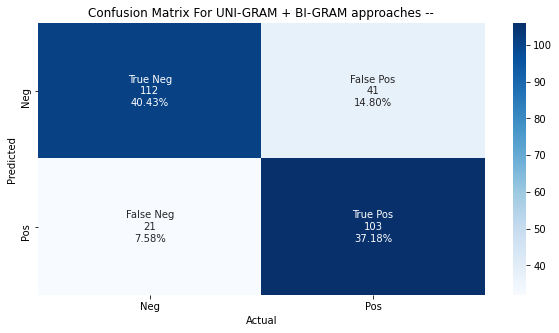

In [37]:
cf_matrix_12_gram = confusion_matrix(clf12.predict(test_X), Y_test)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_12_gram.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_12_gram.flatten()/numpy.sum(cf_matrix_12_gram)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = numpy.asarray(labels).reshape(2,2)

categories = ["Neg", "Pos"]



plt.figure(figsize=(10,5))
ax = sn.heatmap(cf_matrix_2_gram, annot=labels, fmt='', cmap='Blues', xticklabels=categories,yticklabels=categories)
ax.set_ylabel('Predicted')    
ax.set_xlabel('Actual')
ax.set_title("Confusion Matrix For UNI-GRAM + BI-GRAM approaches --")
plt.show(ax)

### UNI-GRAM + BI-GRAM + TRI-GRAM --

In [38]:
#Same as unigram approach, this time we only consider ngram_range = 1,2,3. 
#This means we consider a BOW model, where we have bag full of all the 
#unigrams but on top of that we have the bigrams and also the trigrams too!

#Vectorise our data on on 1,2,3 grams + removing stopWords
vectorizer = CountVectorizer(lowercase=True, stop_words='english',ngram_range=(1,3))

# fit and transform X_train
train_X = vectorizer.fit_transform(X_train)

# Transform X_test
test_X = vectorizer.transform(X_test)


#Calculate time to implement classifier for later comparison
start_time = time.time()

# Create a MultinomialNB object
clf123 = MultinomialNB()

# Fit classifier
clf123.fit(train_X, Y_train)

accuracy = clf123.score(test_X, Y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)
print("The program took %.3f seconds to complete" %(time.time() - start_time))

The accuracy of the classifier on the test set is 0.769
The program took 0.041 seconds to complete


### Confusion matrix for UNI-GRAM + BI-GRAM + TRI-GRAM approach --

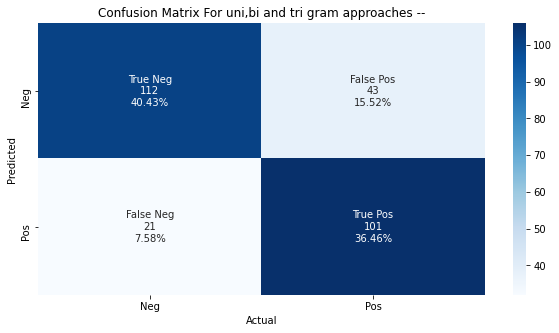

In [39]:
cf_matrix_123_gram = confusion_matrix(clf123.predict(test_X), Y_test)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_123_gram.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_123_gram.flatten()/numpy.sum(cf_matrix_123_gram)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = numpy.asarray(labels).reshape(2,2)

categories = ["Neg", "Pos"]



plt.figure(figsize=(10,5))
ax = sn.heatmap(cf_matrix_2_gram, annot=labels, fmt='', cmap='Blues', xticklabels=categories,yticklabels=categories)
ax.set_ylabel('Predicted')    
ax.set_xlabel('Actual')
ax.set_title("Confusion Matrix For uni,bi and tri gram approaches --")
plt.show(ax)

 # Comparison of Approaches ---
 
 Recap --
 
     task 1 -- Uni-gram approach -- considering the sentiment of singular words
     
     task 2 -- N-grams approach -- considering the sentiment of groups of words
     
I expected there to be a touch of improvement when considering the bi-grams approach as it will take into consideration, the negation of sentiment. However in practise this didn't always occur and often provided a small decrease in accuracy from the unigram approach. As well as this the time taken for the bi-gram approach was often twice as slow. This could pose a problem if say we are dealing with a much larger dataset and deciding on what approach to take. Furthermore I went on to consider a tri-gram approach. The accuracy of this approach dropped dramatically as well as taking longer to process. 

The improvements came when we combined approaches. Instead of just doing a unigram and bigram seperately, when combining them then we saw small improvements to our model. These improvements did come at a cost as it did take over twice as long as when we just focused solely on the uni-gram model. When combing all three aprroaches (uni-gram, bi-gram and tr-gram), because the tri-gram model, was so inefficient, it dragged everything down. The processing speed was very high compared to the uni-gram model. In conlcusion then, the best approach in terms of accuracy would be combining the 1 and 2 gram models. It would be interesting to see the level of imporvements when applying this to an even bigger dataset and whether these results would still hold.

I believe that the expected imporvements did happen. I expected a little bit more of an improvment, because I felt that including things like the ngation statements, would improve our model a lot more than it actually did. However it iomprover never the less. 